# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/BTL_Data_Mining/main/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


## Mô tả bộ dữ liệu
* Bộ dữ liệu "Spotify Analysis Dataset 2025" được tải về từ kaggle. Đây là bộ dữ liệu tổng hợp dành cho Khai phá dữ liệu (EDA) và Machine Learning.
* Bộ dữ liệu bao gồm 8000 dòng với mỗi dòng đại diện cho một người dùng riêng biệt trên ứng dụng Spotify.
* Bộ dữ liệu gồm 12 features và bao gồm 2 kiểu dữ liệu được trộn lẫn: numerical và categorical.
* Use case: Xây dựng một mô hình học máy dự đoán khả năng rời bỏ ứng dụng, phân tích các mô hình tương tác, và giúp Spotify giảm lượng hủy đăng ký dịch vụ từ người dùng.

In [ ]:
# set index cho dataset bằng thuộc tính user_id
df.set_index(df.user_id, inplace=True)
df.drop('user_id', inplace=True, axis=1) # drop cột user_id
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
user_id,,,,,,,,,,,
1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


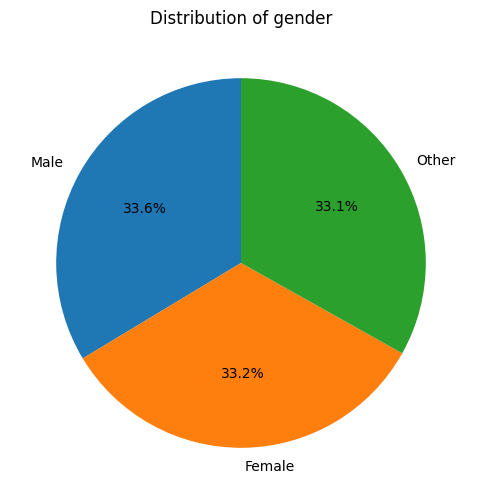

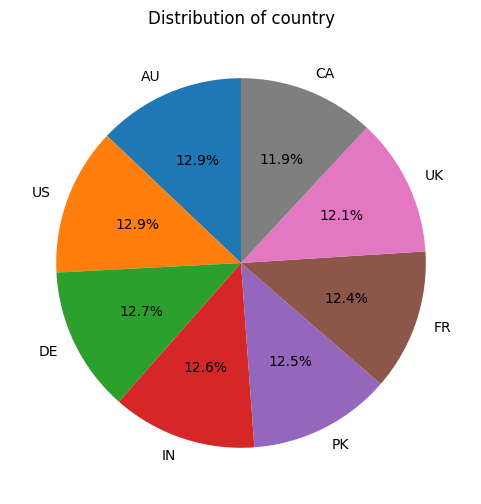

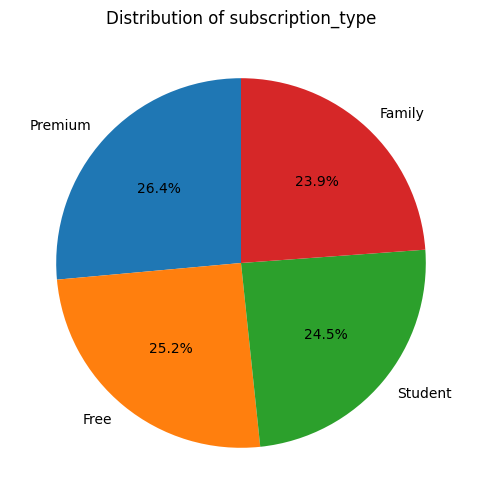

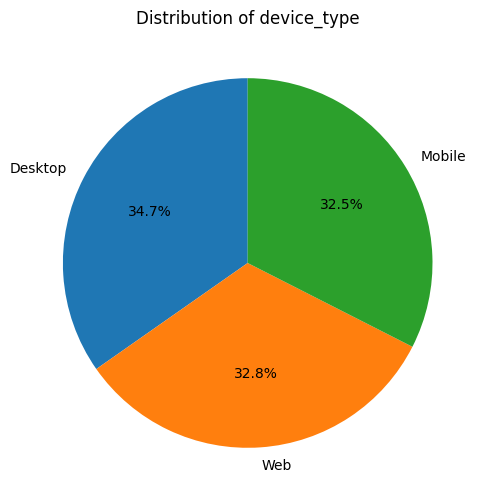

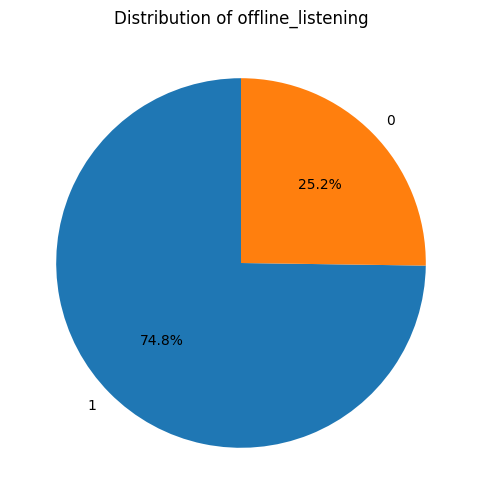

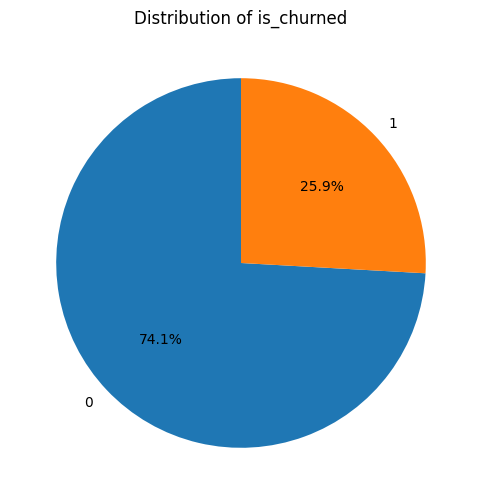

In [ ]:
# --- 3. Biểu đồ dữ liệu phân loại ---
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type', 'offline_listening', 'is_churned']

for col in categorical_cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
    plt.show()

# Features Classification: Categorical vs Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 750.0+ KB


In [ ]:
# Thay đổi kiểu dữ liệu của target feature thành categorical, nhận 2 giá trị {0,1}
df['is_churned'] = df['is_churned'].astype('category')

# for loop chuyển đổi kiểu dữ liệu
features = ['gender', 'country', 'subscription_type', 'device_type', 'offline_listening']
for feature in features:
    df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8000 non-null   category
 1   age                    8000 non-null   int64   
 2   country                8000 non-null   category
 3   subscription_type      8000 non-null   category
 4   listening_time         8000 non-null   int64   
 5   songs_played_per_day   8000 non-null   int64   
 6   skip_rate              8000 non-null   float64 
 7   device_type            8000 non-null   category
 8   ads_listened_per_week  8000 non-null   int64   
 9   offline_listening      8000 non-null   category
 10  is_churned             8000 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 422.9 KB


## Kết quả phân loại
* Sau khi loại bỏ cột user_id và xác định lại kiểu dữ liệu, bộ dữ liệu hiện tại bao gồm 11 features. Trong đó ta xác định được:
  * Có 6 features thuộc kiểu categorical gồm:
    * gender: [Male, Female, Other]
    * country: [AU, US, DE, IN, PK, FR, UK, CA]
    * subscription_type: [Premium, Free, Student, Family]
    * device_type: [Desktop, Web, Mobile]
    * offline_listening: [1,0]
    * is_churned (target feature): [1,0]
  * Có 5 features thuộc kiểu numerical gồm:
    * age
    * listening_time
    * songs_played_per_day
    * skip_rate
    * ads_listened_per_week

## Sự phân bố và đặc điểm theo kiểu dữ liệu

In [ ]:
# Sự phân bổ của các numerical feature
df.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.662125,154.068250,50.127250,0.300127,6.943875
std,12.740359,84.015596,28.449762,0.173594,13.617953
min,16.000000,10.000000,1.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000


In [ ]:
# Sự phân bổ của các categorical feature
df.describe(include=['category'])

,gender,country,subscription_type,device_type,offline_listening,is_churned
count,8000,8000,8000,8000,8000,8000
unique,3,8,4,3,2,2
top,Male,AU,Premium,Desktop,1,0
freq,2691,1034,2115,2778,5982,5929


# Exploratory Data Analysis (EDA)

## EDA for categorical features

### Biều đồ phân bố dữ liệu theo thuộc tính

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def cate_pie_chart(df, col):
  plt.figure(figsize=(6,6))
  df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.ylabel('')
  plt.title(f'Distribution of {col}')
  plt.show()

#### is_churned (target)

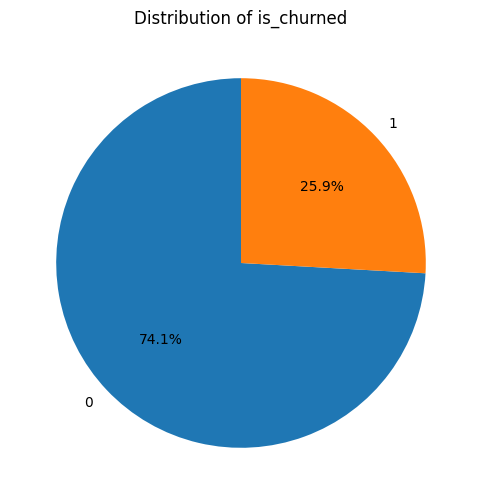

In [ ]:
cate_pie_chart(df, 'is_churned')

* Bộ dữ liệu tương đối mất cân bằng với tỉ lệ lệch nhãn ~26/74

#### gender

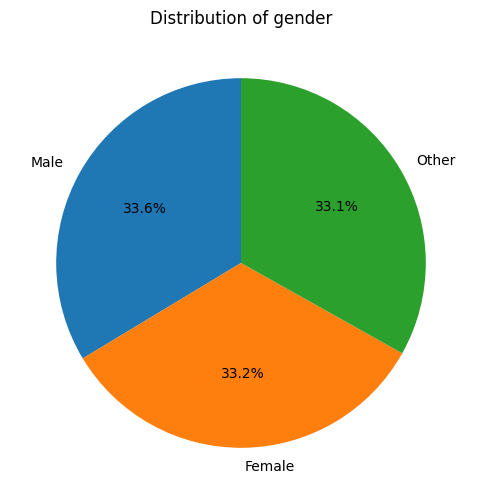

In [ ]:
cate_pie_chart(df, 'gender')

* Các giá trị của thuộc tính gender được phân bổ đồng đều

#### country

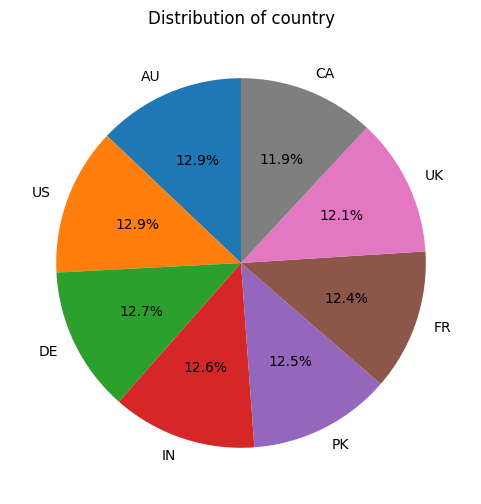

In [ ]:
cate_pie_chart(df, 'country')

* Các giá trị của thuộc tính country được được phân bổ đồng đều

#### subscription_type

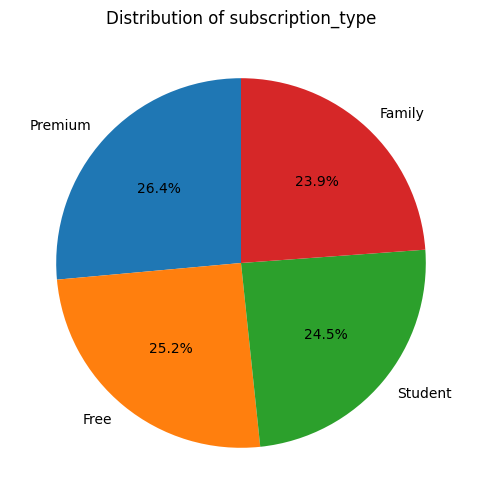

In [ ]:
cate_pie_chart(df, 'subscription_type')

* Sự phân bố giá trị ở thuộc tính subscription_type có sự chênh lệch nhưng không đáng kể

#### device_type

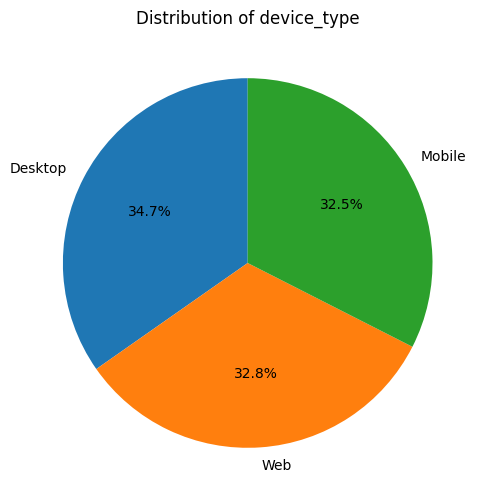

In [ ]:
cate_pie_chart(df, 'device_type')

* Sự phân bố giá trị của thuộc tính dedive_type khá đồng đều, có hơi nhiều hơn về phía Desktop nhưng nhìn chung không đáng kể

#### offline_listening

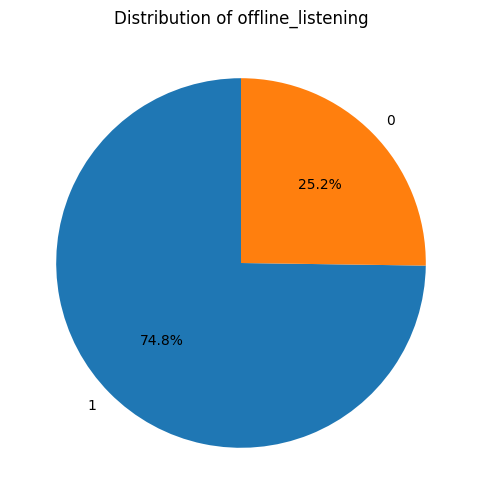

In [ ]:
cate_pie_chart(df, 'offline_listening')

* Sự phân bố giá trị của thuộc tính offline_listening có sự chênh lệch rõ ràng với tỉ lệ 25(0)/75(1)

### Biểu đồ mối liên hệ giữa các thuộc tính và nhãn mục tiêu

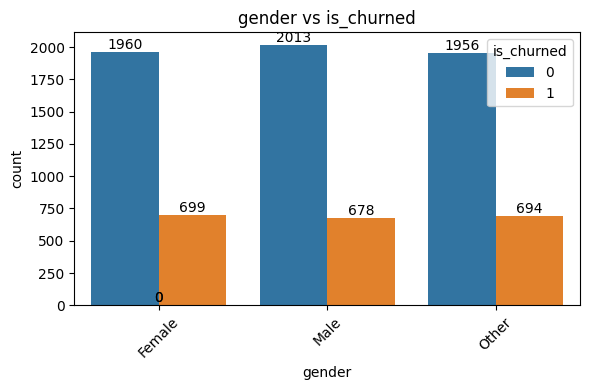

--------------


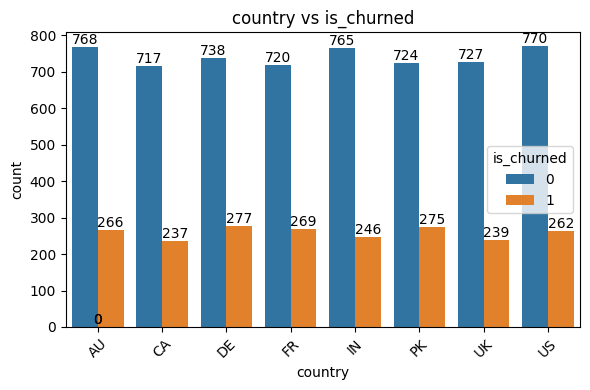

--------------


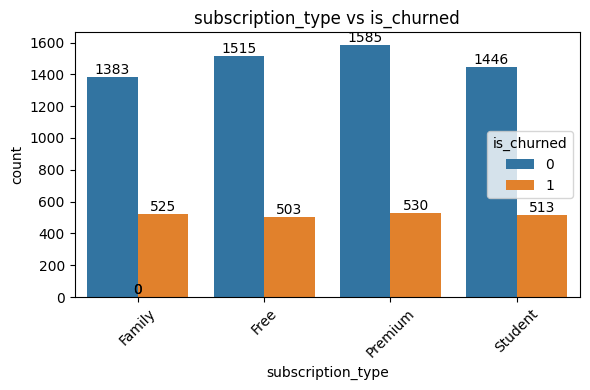

--------------


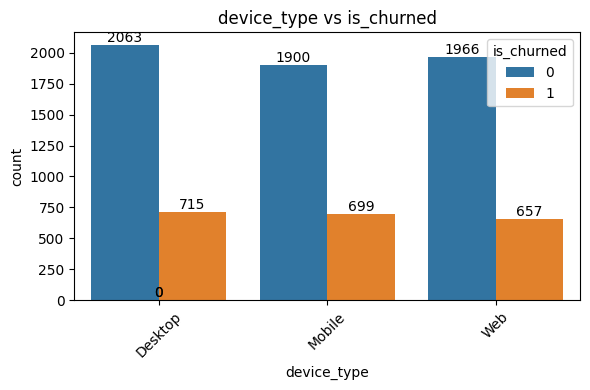

--------------


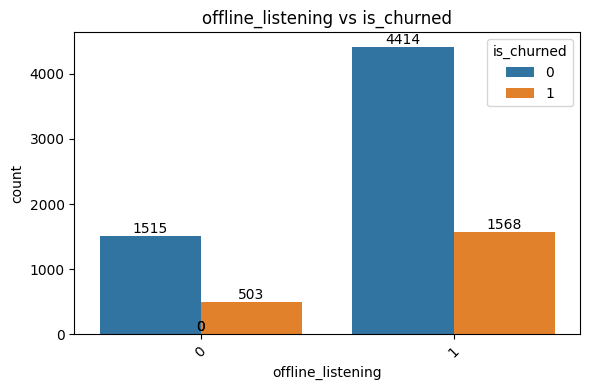

--------------


In [ ]:
for col in categorical_cols:
    if(col == 'is_churned'):
        continue
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, hue='is_churned', data=df)

    # Vẽ số lượng trực tiếp trên từng cột
    n_hue = len(df['is_churned'].unique())
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'{col} vs is_churned')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("--------------")

## EDA for numerical features

<Axes: xlabel='age', ylabel='Count'>

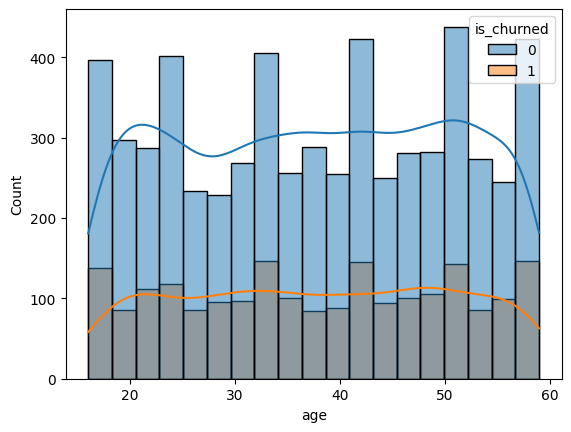

In [ ]:
sns.histplot(x="age", hue='is_churned', data=df, kde=True)

<Axes: xlabel='listening_time', ylabel='Count'>

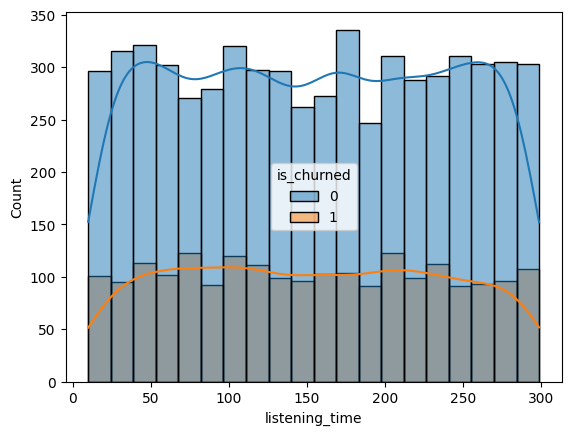

In [ ]:
sns.histplot(x="listening_time", hue='is_churned', data=df, kde=True)

<Axes: xlabel='songs_played_per_day', ylabel='Count'>

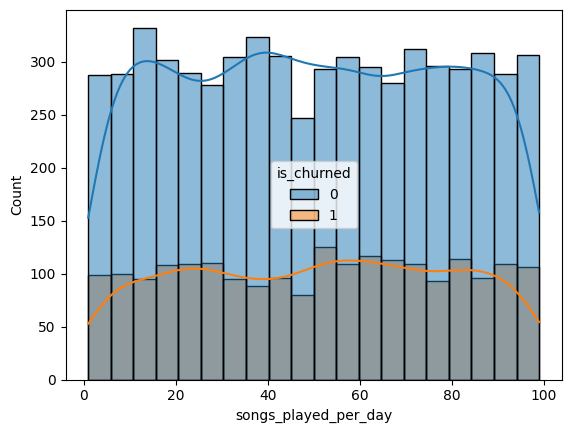

In [ ]:
sns.histplot(x="songs_played_per_day", hue='is_churned', data=df, kde=True)

<Axes: xlabel='skip_rate', ylabel='Count'>

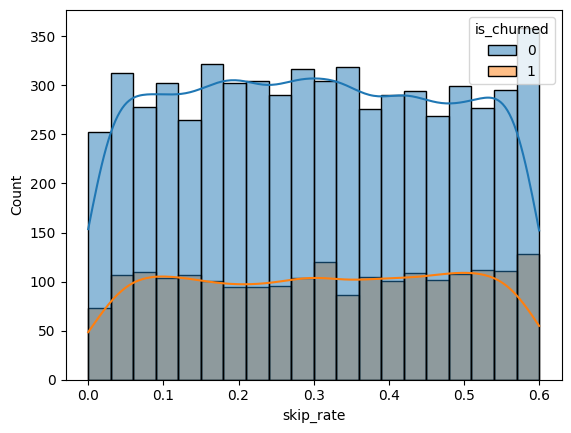

In [ ]:
sns.histplot(x="skip_rate", hue='is_churned', data=df, kde=True)

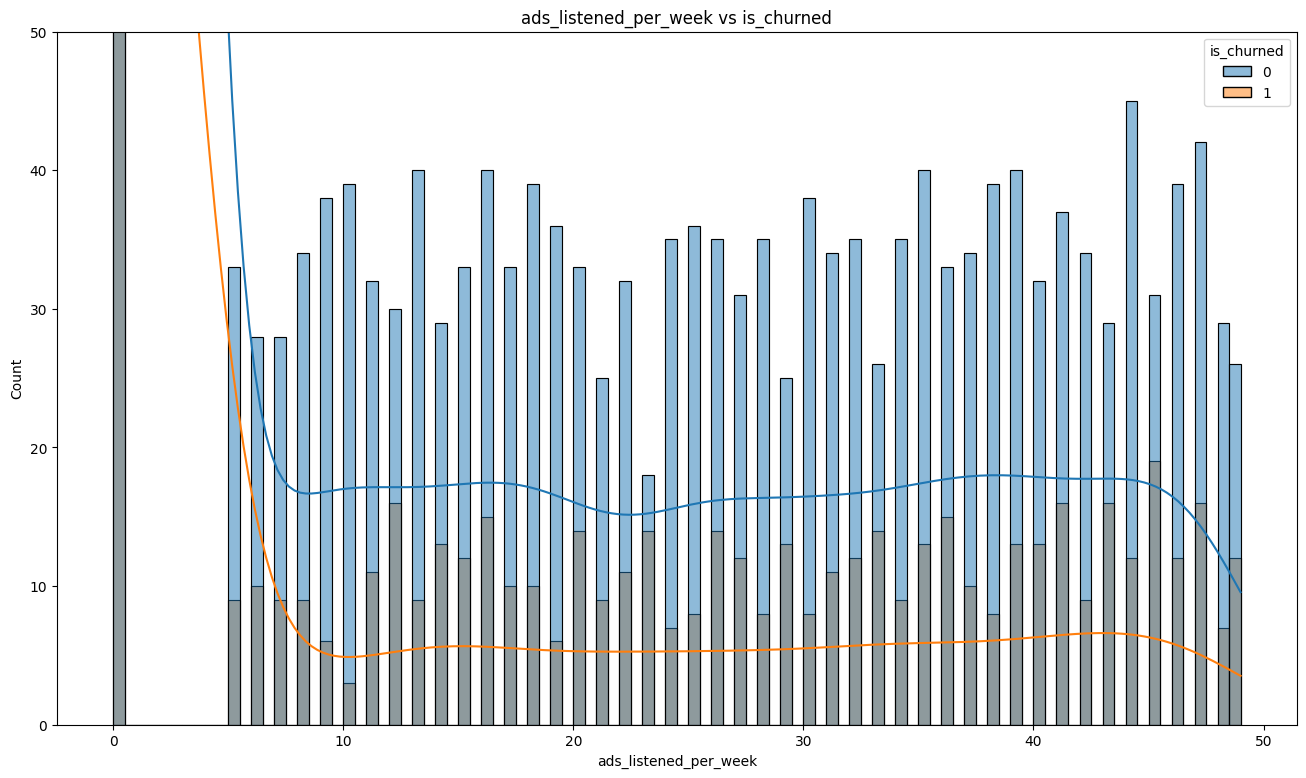

In [ ]:
# sns.histplot(x="ads_listened_per_week", hue='is_churned', data=df, kde=True)
plt.figure(figsize=(16,9))
sns.histplot(x="ads_listened_per_week", hue='is_churned', data=df, kde=True)

plt.ylim(0, 50)  # giới hạn trục y từ 0 đến 100
plt.title("ads_listened_per_week vs is_churned")
plt.show()

# Feature Engineering & Data Wrangling


# Feature Engineering

In [ ]:
import phik
phik_matrix = df.phik_matrix()

interval columns not set, guessing: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']


## Biểu đồ tương quan

<Axes: >

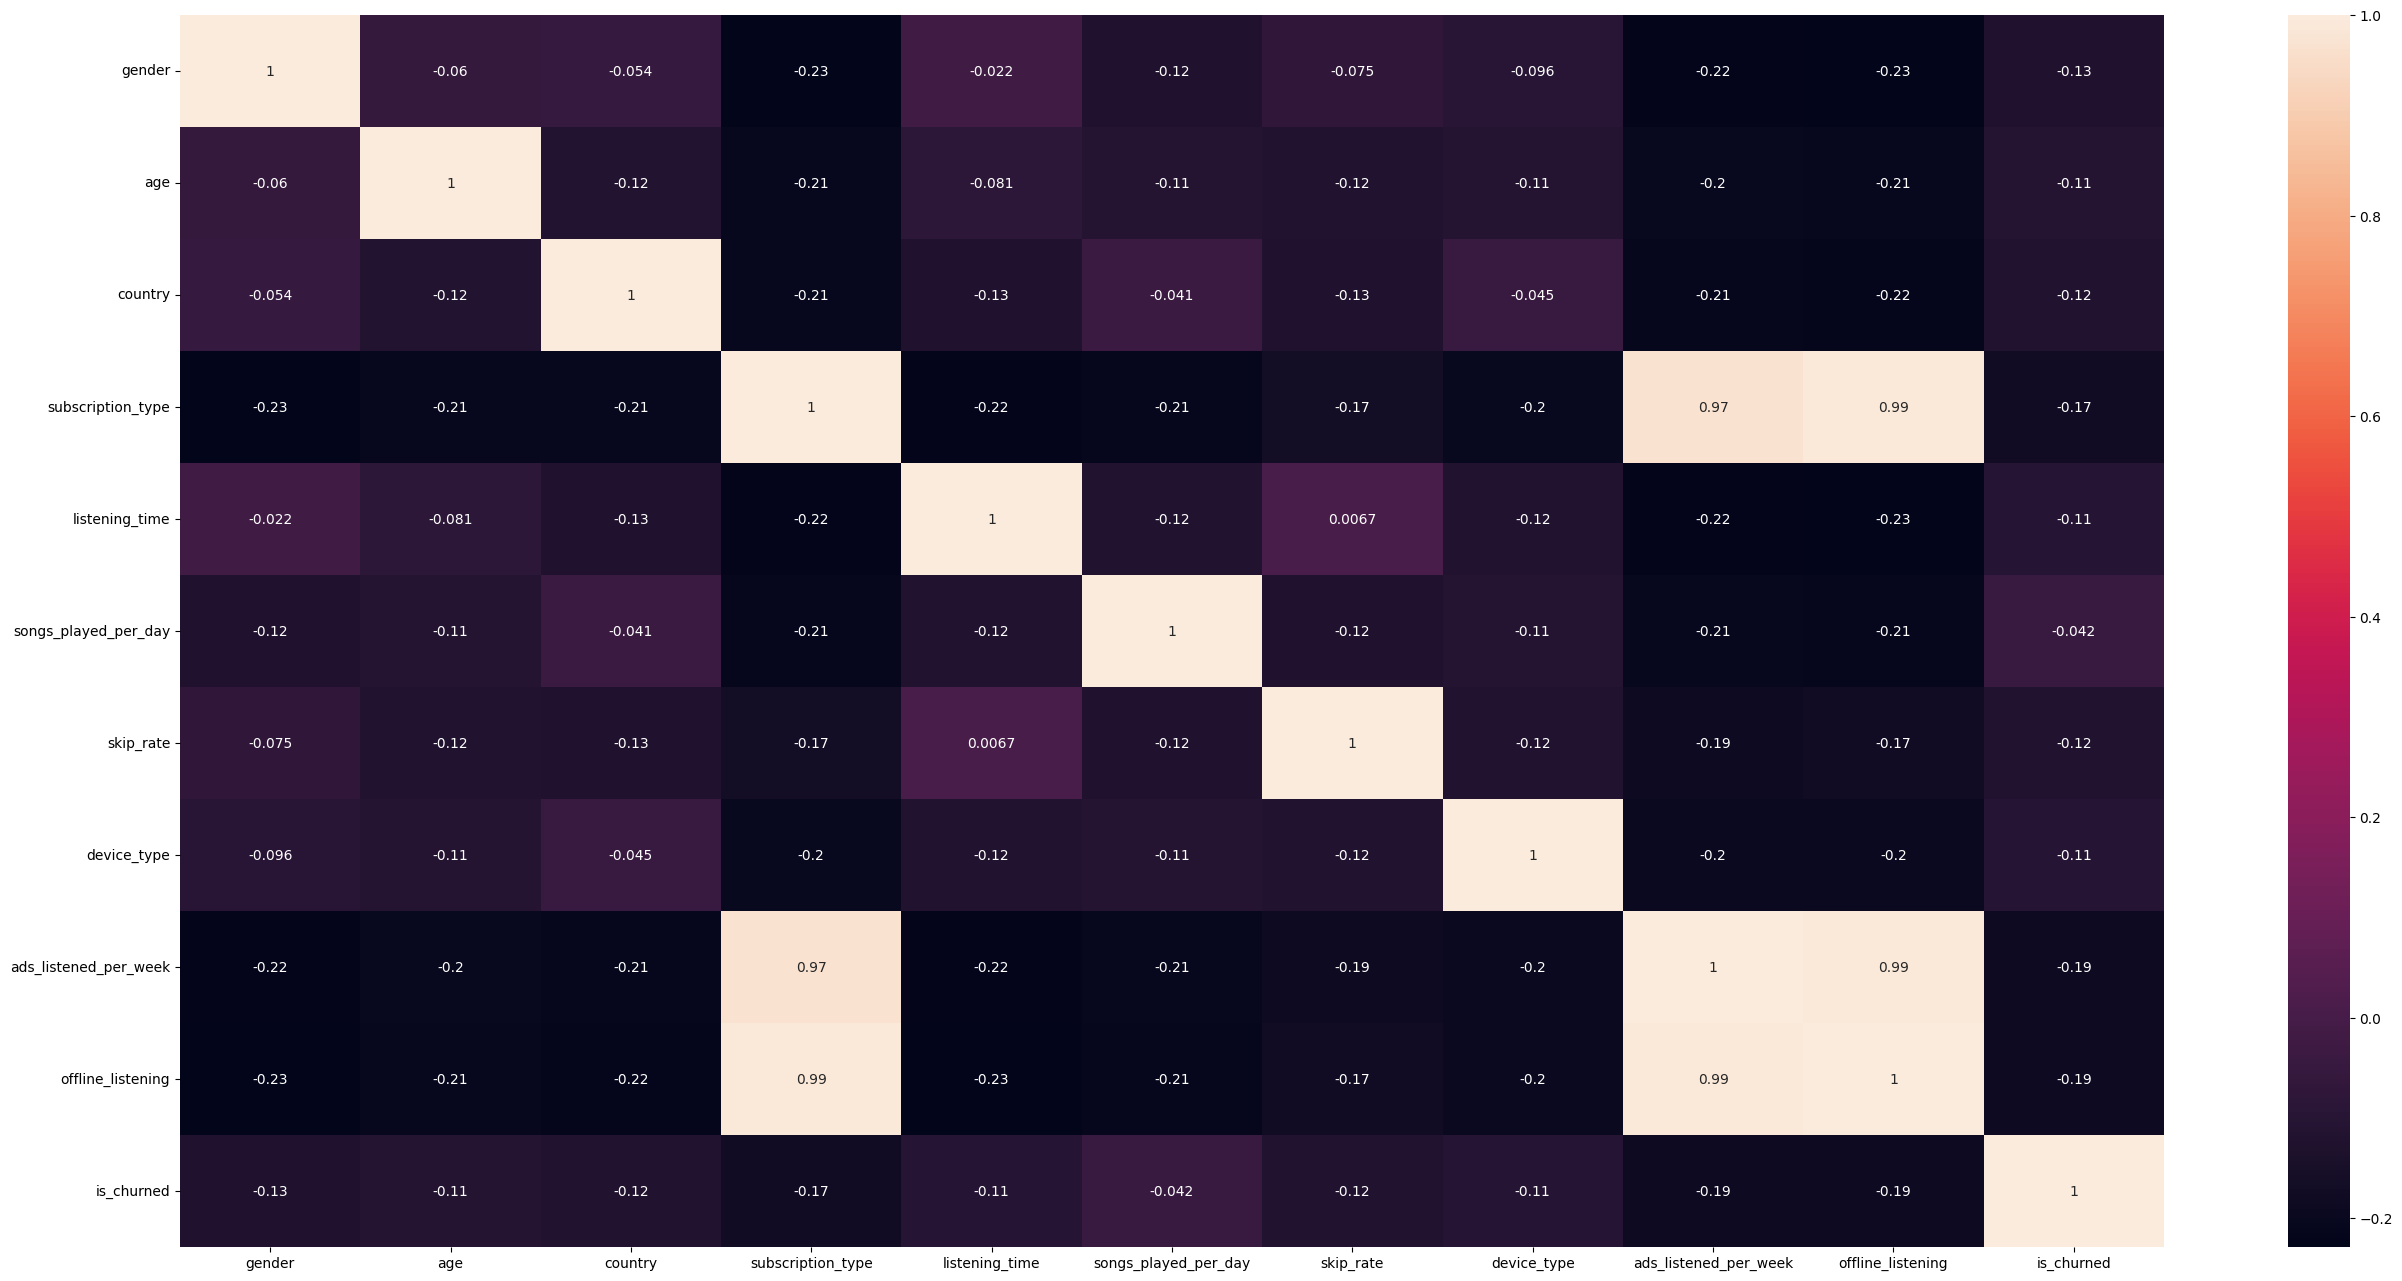

In [ ]:
plt.figure(figsize=(32, 16))
sns.heatmap(phik_matrix.corr(method='pearson'), annot=True)

### Kết luận dựa trên biểu đồ tương quan:
* Vấn đề: Không có thuộc tính nào có mối quan hệ tuyến tính cao với target feature (tức là tất cả các hệ số tương quan Pearson giữa các feature và target đều gần 0), thì điều này cho thấy không tồn tại mối quan hệ tuyến tính mạnh giữa từng feature riêng lẻ với target.
* Giải pháp khắc phục:
  * Loại bỏ một trong hai thuộc tính nằm trong cặp thuộc tính có độ tương quan cao
  * Tạo ra các feature mới dựa trên sự tương tác tiềm năng nhằm tăng mối quan hệ với target.
  * Chọn các mô hình học máy giải quyết tốt bài toán phi tuyến: Random Forest, XGBoost, SVM(rbf),...

## Tạo thêm interaction features

interval columns not set, guessing: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate']


<Axes: >

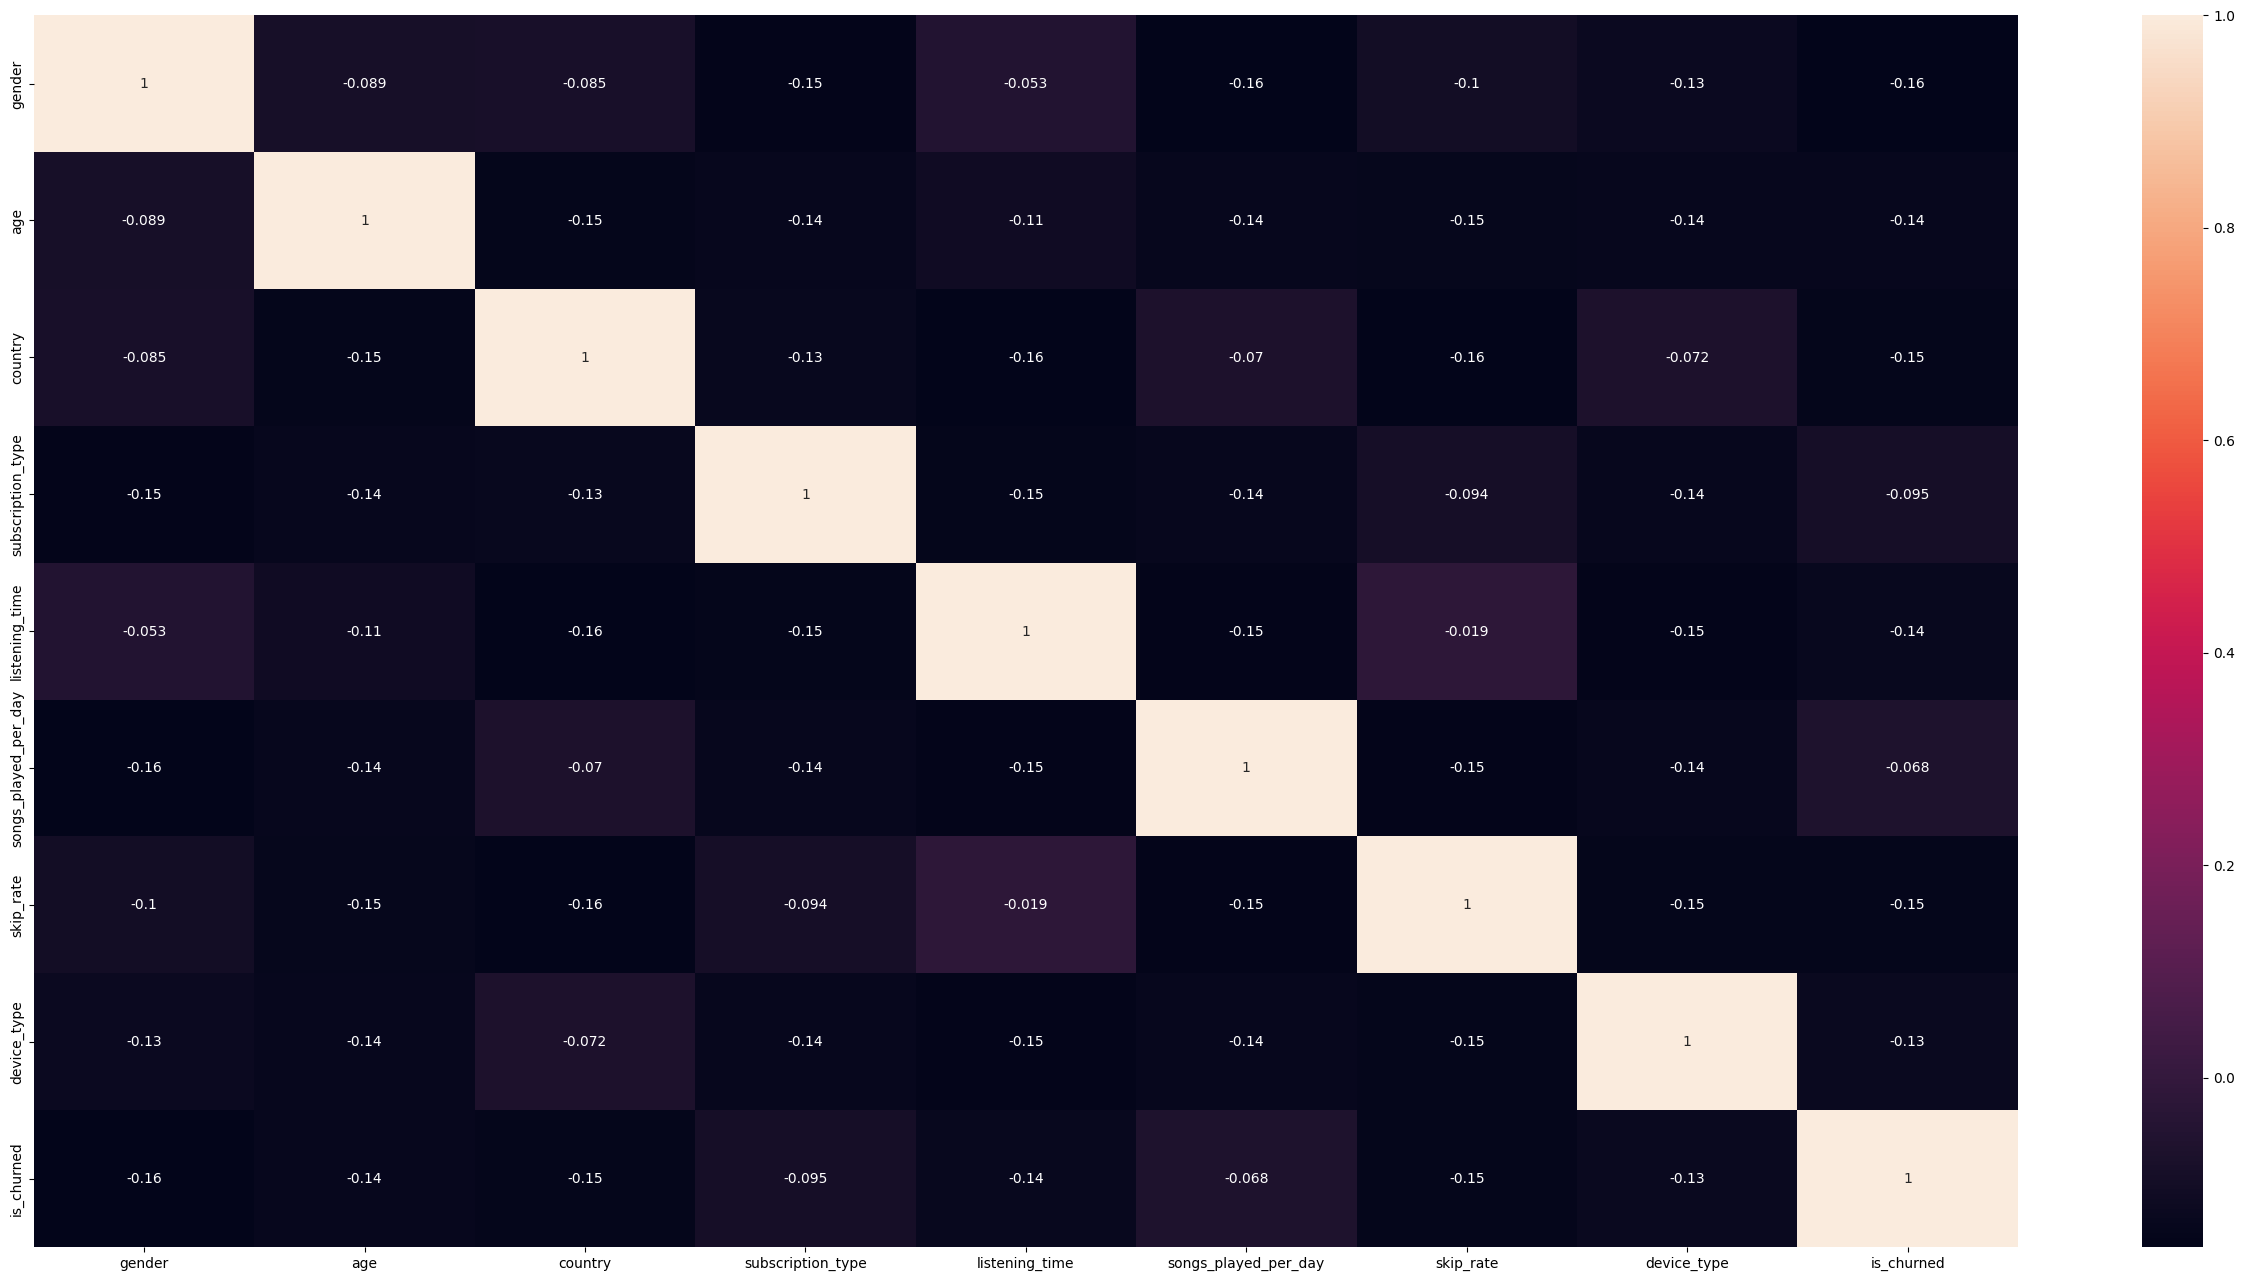

In [ ]:
df = df.drop('offline_listening', axis=1)
df = df.drop('ads_listened_per_week', axis=1)
phik_matrix = df.phik_matrix()
plt.figure(figsize=(32, 16))
sns.heatmap(phik_matrix.corr(method='pearson'), annot=True)

In [ ]:
# 1. high_skip_low_listening
high_skip = df['skip_rate'] > df['skip_rate'].quantile(0.75)
low_listening = df['listening_time'] < df['listening_time'].quantile(0.25)
df['high_skip_low_listening'] = np.where(high_skip & low_listening, 1, 0)

# 2. mobile_high_skip (giả sử device_type_Mobile = 1 nếu Mobile)
df['mobile_high_skip'] = np.where(
    (df['device_type'] == 'Mobile') & (df['skip_rate'] > df['skip_rate'].quantile(0.75)), 1, 0
)

# 3. low_engagement_premium (Premium hoặc Family + low listening)
premium_family = df['subscription_type'].isin(['Premium', 'Family'])
low_engagement = df['listening_time'] < df['listening_time'].quantile(0.3)
df['low_engagement_premium'] = np.where(premium_family & low_engagement, 1, 0)

# 4. high_skip_high_age
df['high_skip_high_age'] = np.where(
    (df['skip_rate'] > df['skip_rate'].quantile(0.75)) & (df['age'] > df['age'].quantile(0.7)), 1, 0
)

# 5. low_songs_high_churn_potential (kết hợp low songs + các yếu tố khác nếu cần)
low_songs = df['songs_played_per_day'] < df['songs_played_per_day'].quantile(0.3)
df['low_songs_low_listening'] = np.where(low_songs & low_listening, 1, 0)

In [ ]:
df['is_churned'] = df['is_churned'].astype(int)
for col in ['high_skip_low_listening', 'mobile_high_skip', 'low_engagement_premium',
            'high_skip_high_age', 'low_songs_low_listening']:
    print(df.groupby(col)['is_churned'].mean())

high_skip_low_listening
0    0.257914
1    0.272904
Name: is_churned, dtype: float64
mobile_high_skip
0    0.256132
1    0.291465
Name: is_churned, dtype: float64
low_engagement_premium
0    0.257362
1    0.267384
Name: is_churned, dtype: float64
high_skip_high_age
0    0.25781
1    0.27451
Name: is_churned, dtype: float64
low_songs_low_listening
0    0.259730
1    0.248333
Name: is_churned, dtype: float64


In [ ]:
df = df.drop('low_engagement_premium', axis=1)
df = df.drop('low_songs_low_listening', axis=1)


interval columns not set, guessing: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'is_churned', 'high_skip_low_listening', 'mobile_high_skip', 'high_skip_high_age']


<Axes: >

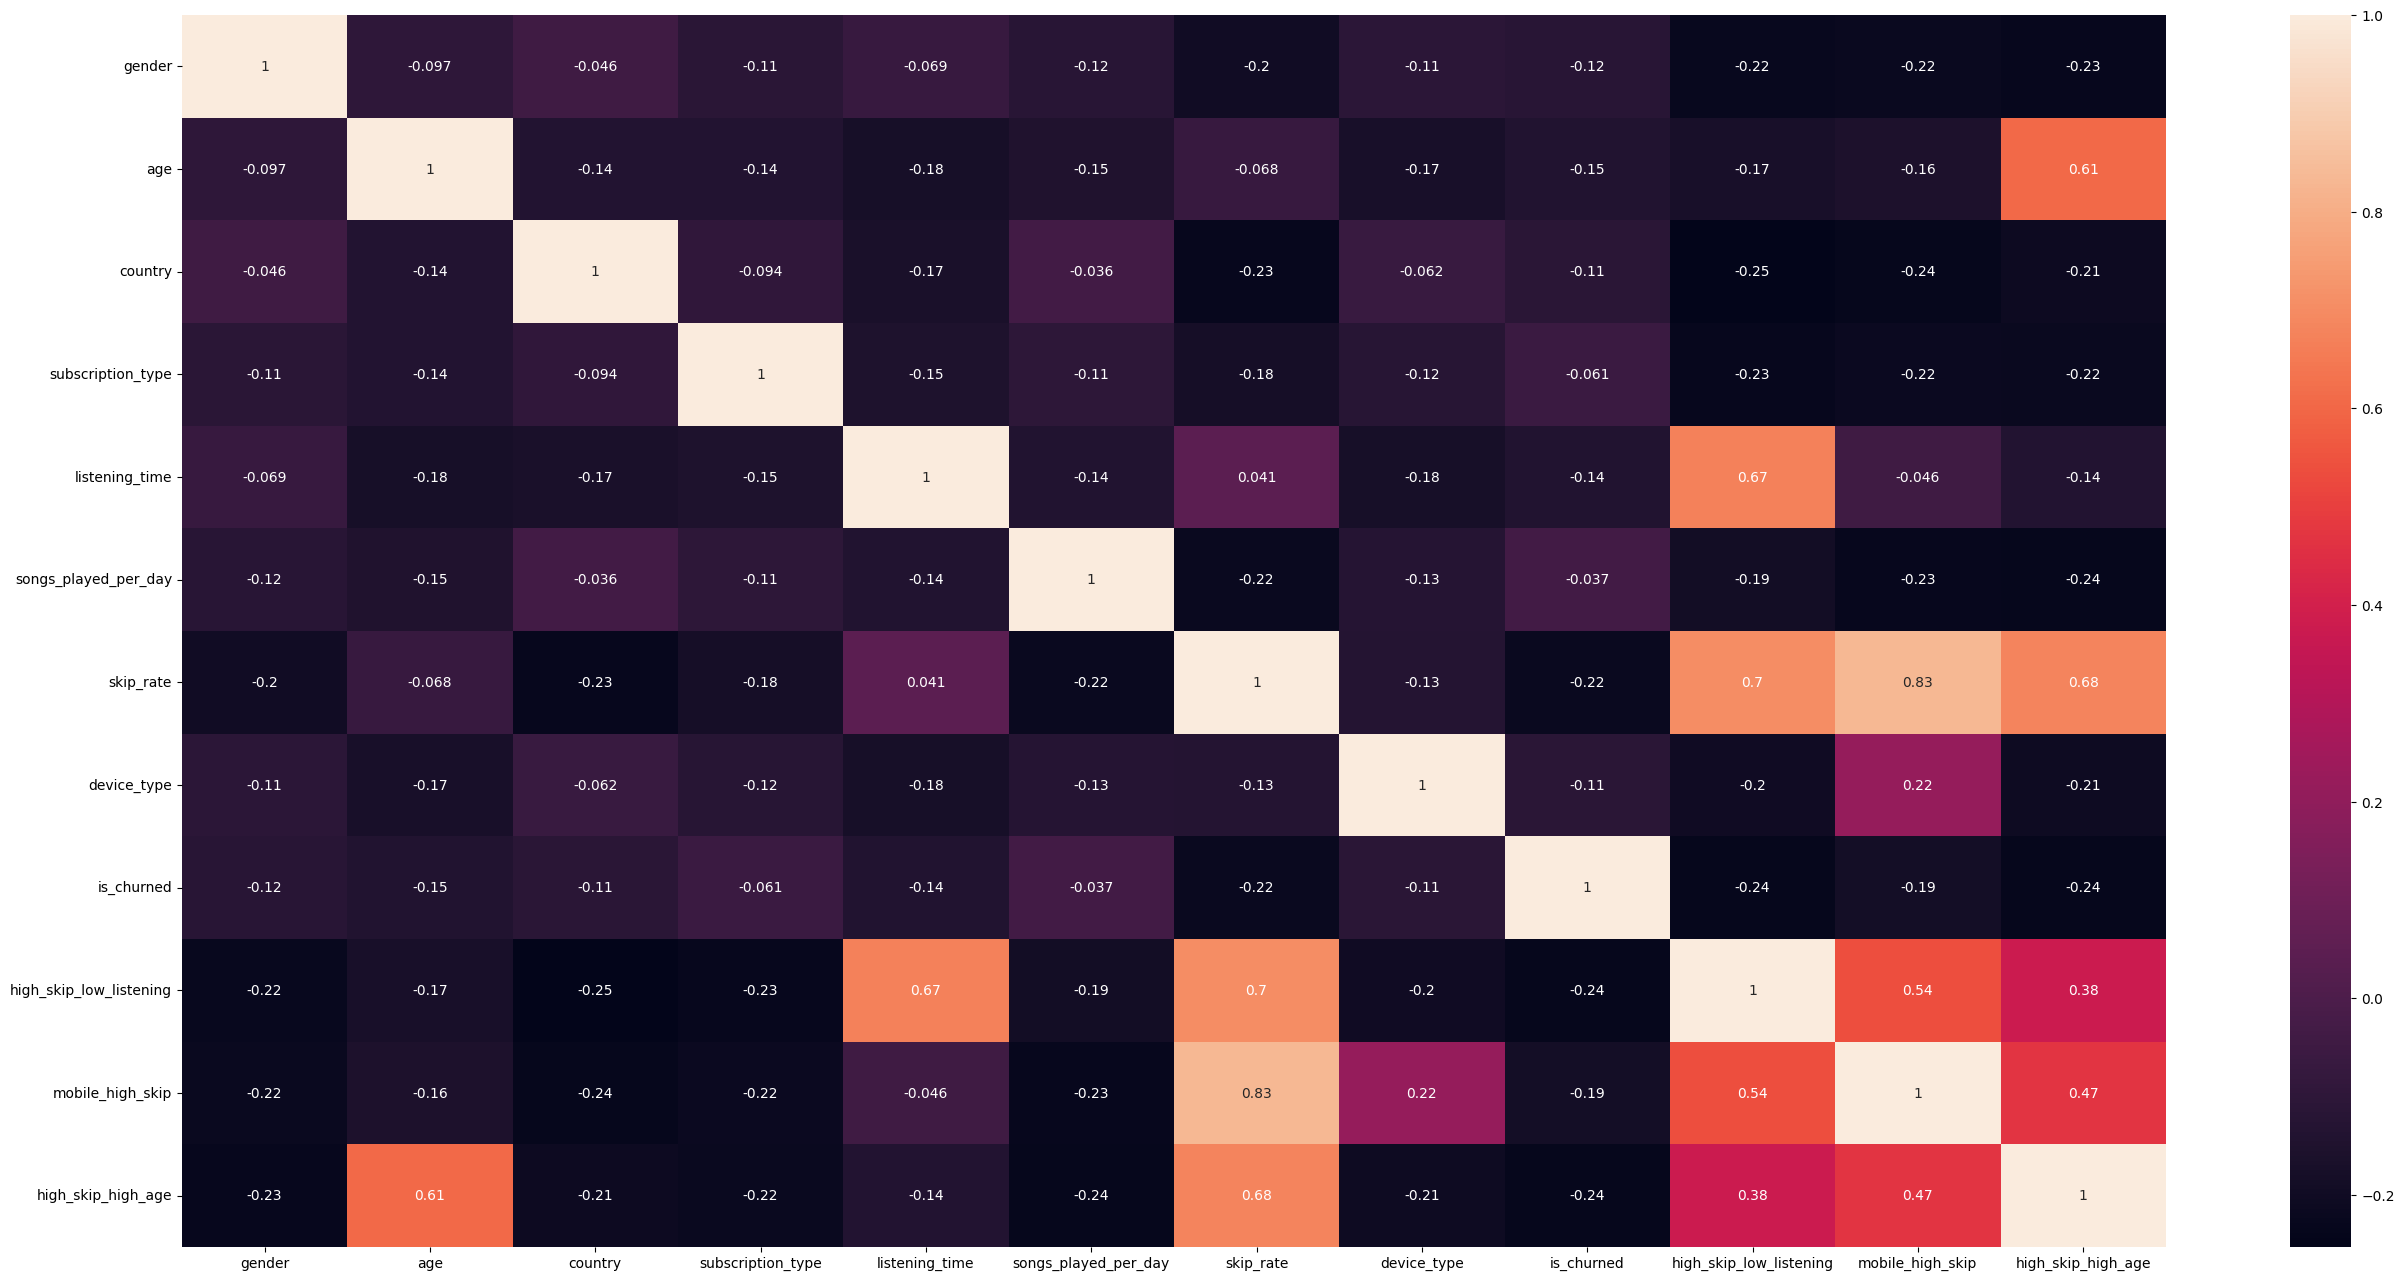

In [ ]:
phik_matrix = df.phik_matrix()
plt.figure(figsize=(32, 16))
sns.heatmap(phik_matrix.corr(method='pearson'), annot=True)

In [ ]:
# Mã hóa dữ liệu chuẩn bị cho train model

numerical_features = [
    'age',
    'listening_time',
    'songs_played_per_day',
    'skip_rate',
    # Các interaction binary bạn đã tạo và muốn giữ
    'mobile_high_skip',
    'high_skip_high_age',
    'high_skip_low_listening',
    # Thêm các interaction khác nếu có
]

categorical_features = [
    'gender',           # Male, Female, Other
    'country',          # AU, US, DE, ...
    'subscription_type',# Premium, Free, Student, Family
    'device_type'       # Desktop, Web, Mobile
]

dataset_dummy = pd.get_dummies(
    df,
    columns=categorical_features,
    drop_first=True   # hoặc False nếu muốn giữ tất cả dummy
)

## Phân bổ dữ liệu 3D

In [ ]:
import umap
import plotly.express as px
import pandas as pd


emb_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(dataset_dummy)

px.scatter_3d(
    emb_3d,
    x=0,
    y=1,
    z=2,
    color=dataset_dummy['is_churned'].astype(str),           # Thay labels → cột is_churned
    color_discrete_map={"0": "#00CC96", "1": "#EF553B"},     # Xanh lá = không churn, Đỏ = churn
    labels={"color": "Churn"},
    title="<b>Phân bố khách hàng trong không gian 3D – UMAP</b><br><sup>Màu đỏ = Có nguy cơ rời bỏ (Churn), Màu xanh = Giữ chân tốt</sup>",
    width=1000,
    height=800,
    opacity=0.8
).update_traces(marker=dict(size=4, line=dict(width=0.5, color='white')))

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Kiểm tra giá trị thiếu

In [ ]:
feature_cols = numerical_features + categorical_features

def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if(missing_count > 0):
      print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values")

display_missing(df, feature_cols)

* Không có missing values

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

dataset_dummy.head()

,age,listening_time,songs_played_per_day,skip_rate,is_churned,high_skip_low_listening,mobile_high_skip,high_skip_high_age,gender_Male,gender_Other,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
user_id,,,,,,,,,,,,,,,,,,,,,
1,54,26,23,0.20,1,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,33,141,62,0.34,0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,True
3,38,199,38,0.04,1,0,0,0,True,False,...,False,False,False,False,False,False,True,False,True,False
4,22,36,2,0.31,0,0,0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
5,29,250,57,0.36,1,0,0,0,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
X = dataset_dummy.drop('is_churned', axis=1)
y = dataset_dummy['is_churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Features (X):", X.shape)
print("Target (y):", y.shape)

Features (X): (8000, 21)
Target (y): (8000,)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Imbalance Processing

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

# Over Sampling
X_borderLineSMOTE_res, y_borderLineSMOTE_res = BorderlineSMOTE(random_state=42, sampling_strategy='minority').fit_resample(X_train, y_train)

# Các thuật toán khai phá dữ liệu có thể áp dụng

In [ ]:
# Import thư viện
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, cv, DMatrix
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import warnings
warnings.filterwarnings("ignore")

## RandomForest

Test ROC-AUC: 0.5357
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1186
           1       0.30      0.25      0.27       414

    accuracy                           0.66      1600
   macro avg       0.53      0.52      0.52      1600
weighted avg       0.64      0.66      0.64      1600



Text(0.5, 1.0, 'Confusion Matrix')

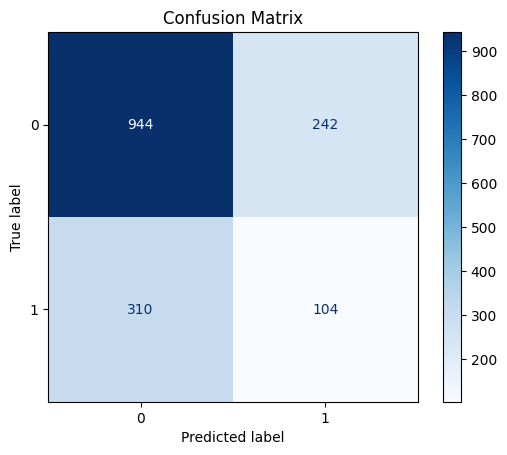

In [ ]:
random_forest_model = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    n_jobs=-1)
random_forest_model.fit(X_borderLineSMOTE_res, y_borderLineSMOTE_res)

y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## Gradient Boosting

Test ROC-AUC 0.5223

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.90      0.82      1186
           1       0.28      0.11      0.16       414

    accuracy                           0.70      1600
   macro avg       0.51      0.51      0.49      1600
weighted avg       0.62      0.70      0.65      1600



Text(0.5, 1.0, 'Confusion Matrix')

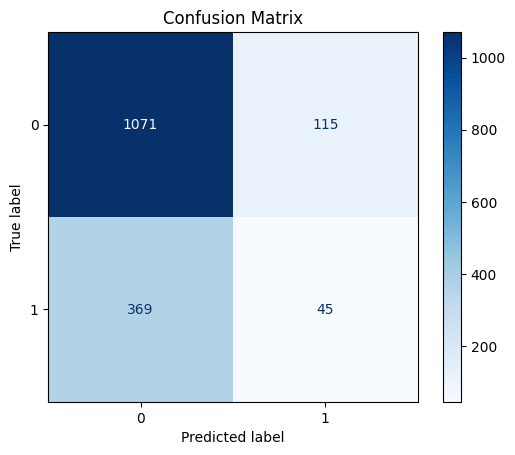

In [ ]:
gradient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    random_state=42
)

gradient_boosting_model.fit(X_borderLineSMOTE_res, y_borderLineSMOTE_res)
y_pred = gradient_boosting_model.predict(X_test)
y_pred_proba = gradient_boosting_model.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## XGBoost

Test ROC-AUC 0.5045

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.13      0.22      1186
           1       0.26      0.87      0.40       414

    accuracy                           0.32      1600
   macro avg       0.50      0.50      0.31      1600
weighted avg       0.62      0.32      0.26      1600



Text(0.5, 1.0, 'Confusion Matrix')

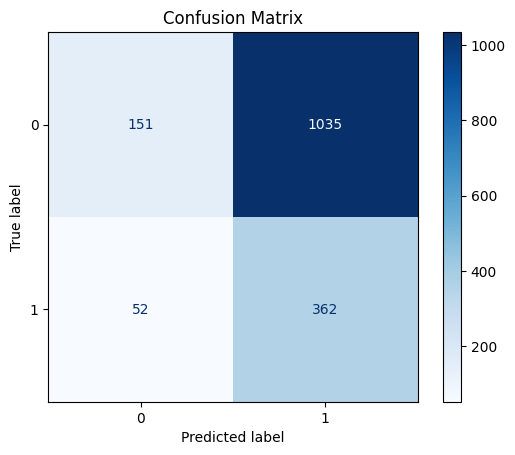

In [ ]:
XGB_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=3,
    eval_metric='aucpr',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.01,
    random_state=42,
    tree_method='hist',
    colsample=0.6,
    reg_alpha=0.1,
    reg_lambda=1.0,
    subsample=0.6)

XGB_model.fit(X_borderLineSMOTE_res, y_borderLineSMOTE_res)
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## Logistic Regression

Test ROC-AUC 0.4783

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.50      0.60      1186
           1       0.25      0.48      0.33       414

    accuracy                           0.50      1600
   macro avg       0.49      0.49      0.46      1600
weighted avg       0.61      0.50      0.53      1600



Text(0.5, 1.0, 'Confusion Matrix')

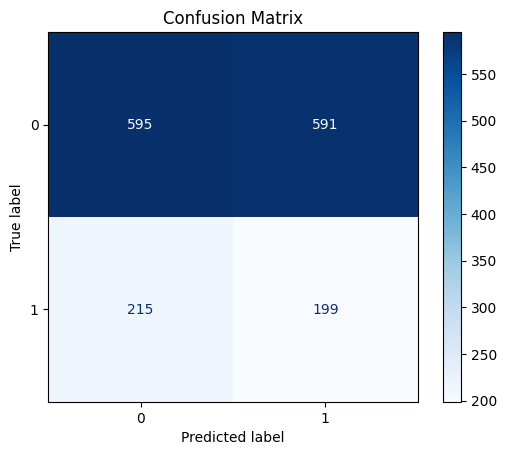

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(
        class_weight='balanced',
        max_iter=500,
        random_state=42,
        n_jobs=-1)
logistic_model.fit(X_borderLineSMOTE_res, y_borderLineSMOTE_res)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')